## Visualization of Dataset Properties

In [1]:
"""
    IMPORTING LIBS
"""
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
os.chdir('../')
sys.path.append('./')
os.getcwd()
from prepare_dataset import SuperPixDataset, DGLFormDataset

###  MNIST/CIFAR10 Superpixels Dataset Visualization Script

In [2]:
def visualize_superpixels_data(DATASET_NAME):
    print("[I] Loading data ...")
    dataset = SuperPixDataset(DATASET_NAME)
    print("[I] Finished loading.")

    # Original Statistics
    num_nodes, graph_labels = [], []
    for split in [dataset.train, dataset.val]:
        num_nodes += [g.number_of_nodes() for g in split[:][0]]
        graph_labels += list(split[:][1])
    orig_mean, orig_std, orig_max, orig_min = np.mean(num_nodes), np.std(num_nodes), np.max(num_nodes), np.min(num_nodes)

    max_nodes = int(orig_mean+orig_std)
    print("Original Dataset Statistics:\n")
    print("Max nodes {}, Min nodes {}\n".format(orig_max, orig_min))
    print("Mean no. of nodes {}, S.d. {}\n".format(orig_mean, orig_std))

    num_nodes, graph_labels = [], []
    for split in [dataset.train, dataset.val]:
        split_num_nodes, split_graph_labels = [], []
        g = split[:][0]
        lab = split[:][1]
        for idx in range(len(g)):
            if g[idx].number_of_nodes() < max_nodes:
                split_num_nodes.append(g[idx].number_of_nodes())
                split_graph_labels.append(lab[idx].item())


        num_nodes += split_num_nodes
        graph_labels += split_graph_labels
    label_bins = len(np.unique(graph_labels))
    
    print("VISUALIZATIONS:\nMax nodes in consideration: {}".format(max_nodes))
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    
    plt.hist(num_nodes, bins=len(np.unique(num_nodes)))
    plt.xlabel('Number of Nodes in Graph', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.subplot(122)
    plt.hist2d(graph_labels, num_nodes, bins=[label_bins, 20])
    plt.xlabel(r'Graph label', fontsize=12)
    plt.ylabel(r'Graph size (number of nodes)', fontsize=12)
    plt.colorbar()
    if not os.path.exists('./demo/dataset_visualization'):
        os.makedirs('./demo/dataset_visualization')
    plt.savefig('./demo/dataset_visualization/'+ DATASET_NAME +'.pdf', pad_inches=0, bbox_inches='tight')
    plt.show()

### Superpixels Dataset MNIST

[I] Loading data ...
[I] Loading dataset mnist...
train, val sizes : 53994 6006
[I] Data load time: 52.7359s
[I] Finished loading.
Original Dataset Statistics:

Max nodes 75, Min nodes 37

Mean no. of nodes 66.99996666666667, S.d. 10.708127754135587

VISUALIZATIONS:
Max nodes in consideration: 77


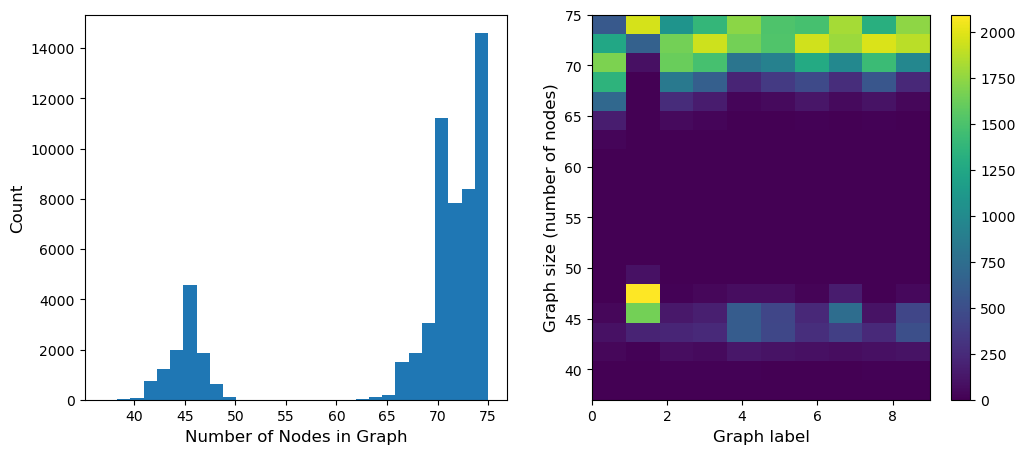

In [3]:
visualize_superpixels_data('mnist')

[I] Loading data ...
[I] Loading dataset cifar10...
train, val sizes : 45000 5000
[I] Data load time: 31.6755s
[I] Finished loading.
Original Dataset Statistics:

Max nodes 128, Min nodes 68

Mean no. of nodes 108.7081, S.d. 5.6258772107112325

VISUALIZATIONS:
Max nodes in consideration: 114


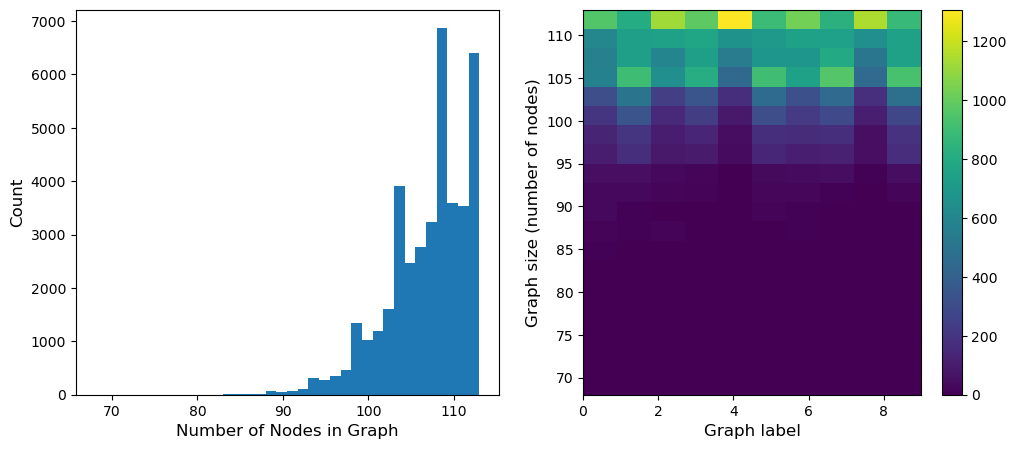

In [4]:
visualize_superpixels_data('cifar10')

In [ ]:
visualize_superpixels_data('fashionmnist')